# Flight Data Analytics

## Overview
Flight Data Analytics analyzes aviation accident data to identify potential risks associated with expansion to the aviation industry as well advise on how to mitigate said risks. The analysis leverages accident data to inform decisions on aircraft acquisition, equipment purchase as well as staff training for commercial and private enterprises.

## Business Problem
Our company is expanding into aviation and needs to evaluate potential risks associated with managing fleets of airplanes. The goal is to:
1.determine which aircraft are safest 
2.Necessary equipment to be purchased to enhance safety
3.Necessary experience needed by new recruits as well as additional training they should undertake

## Data Understanding

The data is sourced from the National Transportation Safety Board (NTSB), covering aviation accidents from 1948 to the end of 2022. It includes information such as:
1.accident severity
2,aircraft type
3.injury statistics
3.weather condition 
4.plane make and model 

For this particular project we will only analyse data going back six(6) years for actionable insight as requested by management


In [116]:
#importing standard libraries

from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns


In [117]:
pd.set_option("display.max_columns",500) #This allows me to look at all columns of the data frame

data=pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Phase 1 project\AviationData.csv",encoding="ISO-8859-1",dtype={6:str,7:str,28:str})  #Importing the data from my hard drive

In [118]:
df=data.copy()#Create a copy of the data to use for manipulation
df.head() #Check the first five rows make sure data is succesfully imported


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [77]:
df.shape #Checking the number of rows and columns

(88889, 31)

In [78]:
df.columns #Check for column names

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [79]:
df.info() #Summary of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [80]:
df.describe() #Statistical summary of my data frame

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [81]:
df.isnull().sum() #Check for null values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

# DATA PREPARATION

## Data Cleaning

In [82]:
#Check and drop duplicates
df.duplicated().sum()

0

In [125]:
#Standardize column names by removing white space, lowercase, using underscore to space 
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_").str.replace(".","_")

df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [134]:
#Drop data that is more than 6 years old 

#Covert event_date to date time format
df["event_date"]=pd.to_datetime(df["event_date"])
df["event_date"].isnull().sum() #check for any null values of thr event_date column

start="2017-01-01" #Define the start date

df=df[df["event_date"]>=start] #Filter the data set

df.head(10) #Check whether its been correctly filtered

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
79402,20170110X14448,Accident,GAA17CA108,2017-01-01,"Casa Grande, AZ",United States,325723N,1114550W,CGZ,CASA GRANDE MUNI,Non-Fatal,Substantial,Airplane,N5897R,larson roger h,RV-7,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,The pilots inadvertent application of the aut...,25-09-2020
79403,20170117X42903,Accident,CEN17LA079,2017-01-01,"New Braunfels, TX",United States,293829N,0981210W,NaN,NaN,Non-Fatal,Substantial,Airplane,N415HC,quicksilver,GT-400 R503,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,The partial loss of engine power due to a loos...,25-09-2020
79404,20170103X14851,Accident,WPR17FA045,2017-01-02,"Payson, AZ",United States,342547N,1111640W,NaN,NaN,Fatal,Destroyed,Airplane,N272EF,cessna,T210K,No,1.0,Reciprocating,091,NaN,Personal,NaN,4.0,0.0,0.0,0.0,imc,NaN,The non-instrument-rated pilot's improper deci...,25-09-2020
79405,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,472354N,0114491W,NaN,NaN,Non-Fatal,Substantial,Airplane,N710XP,softex invest llc,V-24L,No,2.0,Reciprocating,091,NaN,Ferry,SUMMIT INTERNATIONAL AMERICAN LTD,0.0,0.0,2.0,0.0,vmc,NaN,A partial loss of power during cruise flight f...,25-09-2020
79406,20170105X45917,Accident,WPR17LA048,2017-01-04,"Napa, CA",United States,381232N,1221724W,APC,NAPA COUNTY,Non-Fatal,Substantial,Airplane,N4518S,schosanski john h,COZY MK IV R,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,vmc,NaN,A partial loss of power due to missing apex se...,25-09-2020
79407,20170105X51011,Accident,CEN17LA068,2017-01-04,"Nacogdoches, TX",United States,313458N,0944225W,OCH,A L MANGHAM JR RGNL,Non-Fatal,Substantial,Airplane,N1159G,mooney aircraft corp.,M20,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,vmc,NaN,The loss of engine power for reasons that coul...,25-09-2020
79408,20170105X81632,Accident,CEN17FA067,2017-01-04,"Brookfield, WI",United States,043525N,0881041W,02C,Capitol Airport,Fatal,Substantial,Airplane,N311SD,demmer,BD-4,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,1.0,0.0,1.0,1.0,vmc,NaN,The pilot's failure to abort the takeoff when ...,25-09-2020
79409,20170105X41106,Accident,WPR17FA047,2017-01-05,"San Pedro, CA",United States,334225N,1181528W,NaN,NaN,Fatal,Substantial,Helicopter,N702JJ,robinson helicopter,R22 BETA,No,1.0,Reciprocating,091,NaN,Aerial Observation,NaN,2.0,0.0,0.0,0.0,vmc,NaN,The pilot's failure to use carburetor heat whi...,25-09-2020
79410,20170105X74726,Accident,CEN17FA071,2017-01-05,"Gurdon, AR",United States,335434N,0093825W,NaN,NaN,Fatal,Destroyed,Airplane,N972JK,columbia aircraft mfg,LC41 550FG,No,1.0,Reciprocating,091,NaN,Personal,NaN,2.0,0.0,0.0,0.0,vmc,NaN,The loss of control in flight for reasons that...,25-09-2020
79411,20170105X85226,Accident,ERA17LA078,2017-01-05,"Atlanta, GA",United States,034047N,0843549W,RYY,Cobb County International Airp,Non-Fatal,Substantial,Airplane,N683AM,aircraft mfg & development co,CH 2000,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,1.0,0.0,vmc,NaN,The pilot's exceedance of the airplane's criti...,25-09-2020


In [136]:
df.shape #The new shape of the filtered data

(9487, 31)

In [137]:
df.isnull().sum() #Check the null values of the new data

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
schedule                  8421
purpose_of_flight         2194
air_carrier               5769
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
broad_phase_of_flight     9487
report_status             4522
publication_date           953
dtype: int64

In [138]:
#Drop columns with more than 50% of missing values
thresh=len(df)*0.5
df=df.loc[:,df.isnull().sum()<=thresh]

df.isnull().sum()

event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
report_status             4522
publication_date           953
dtype: int64

In [140]:
#Filling in numerical columns
numcol=["total_fatal_injuries", "total_serious_injuries","total_minor_injuries","total_uninjured" ]
#The numerical columns will be filled with [0]
df[numcol]=df[numcol].fillna(0)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_31572\3714289039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numcol]=df[numcol].fillna(0)


event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity            559
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition         2320
report_status             4522
publication_date           953
dtype: int64

In [142]:
#Categorical columns
catcol=["location","injury_severity","weather_condition","country"]
#They will be filled with unknown
df[catcol]=df[catcol].fillna("unknown")

df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_31572\2332919721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[catcol]=df[catcol].fillna("unknown")


event_id                     0
investigation_type           0
accident_number              0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
airport_code              3979
airport_name              4162
injury_severity              0
aircraft_damage            780
aircraft_category          192
registration_number          2
make                         0
model                        0
amateur_built                0
number_of_engines         2019
engine_type               3795
far_description            199
purpose_of_flight         2194
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
report_status             4522
publication_date           953
dtype: int64

In [143]:
#Dropping columns not useful for the analysis
df=df.drop(columns=["airport_code","airport_name","registration_number","publication_date","accident_number",])





In [149]:
df.isnull().sum()

event_id                     0
investigation_type           0
event_date                   0
location                     0
country                      0
latitude                  1347
longitude                 1347
injury_severity              0
aircraft_damage              0
aircraft_category          192
make                         0
model                        0
amateur_built                0
number_of_engines            0
engine_type                  0
far_description            199
purpose_of_flight            0
total_fatal_injuries         0
total_serious_injuries       0
total_minor_injuries         0
total_uninjured              0
weather_condition            0
report_status                0
dtype: int64

In [152]:
#Drop all other null values
df=df.dropna()

In [157]:
df.shape

(8100, 23)

In [155]:

#Check our final data set with no null values
df.isnull().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
latitude                  0
longitude                 0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
far_description           0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
report_status             0
dtype: int64

In [158]:
df.to_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Phase 1 project\AviationData_clean.csv",index=False)


## Feature Engineering 

Planes in the data set have different uses and we are only interested in planes for commercial and private enterprises


In [159]:
# # Display all unique makes in the dataset
# unique_makes = df['make'].unique()

# # Print the unique makes
# print("Unique Aircraft Makes:")
# print(unique_makes)

# print(f"Total unique aircraft makes: {len(unique_makes)}")

# # Display the first 50 unique makes
# print("Sample of Unique Aircraft Makes:")
# print(unique_makes[:50])

Unique Aircraft Makes:
['larson roger h' 'quicksilver' 'cessna' ... 'james r dernovsek'
 'orlican s r o' 'arado-flugzeugwerke gmbh']
Total unique aircraft makes: 1329
Sample of Unique Aircraft Makes:
['larson roger h' 'quicksilver' 'cessna' 'softex invest llc'
 'schosanski john h' 'mooney aircraft corp.' 'demmer'
 'robinson helicopter' 'columbia aircraft mfg'
 'aircraft mfg & development co' 'canadair' 'cirrus'
 'christen industries inc' 'maule' 'fields' 'mooney' 'piper'
 'sharpe william l' 'beech' 'aeronca' 'american champion aircraft'
 'textron aviation inc' 'american legend aircraft co' 'johnson'
 'air tractor inc' 'hawker beechcraft' 'hawker beechcraft corp' 'bellanca'
 'bombardier inc' 'bell' 'cirrus design corp'
 'eurocopter deutschland gmbh' 'ercoupe' 'great lakes' 'vaughan gerald r'
 'aviat aircraft inc' 'zenith' 'cook' 'robinson michael e'
 's c aerostar s a' 'bell helicopter textron' 'robinson' 'shell john'
 'saab' 'md helicopter' 'hughes' 'bell-transworld helicopters'
 'niel

# ANALYSIS

## 1. Accidents Trends overtime

This visualisation shows a steady decline of accidents altogether from the 80s to present of more than 50%

Text(0, 0.5, 'No. of accidents')

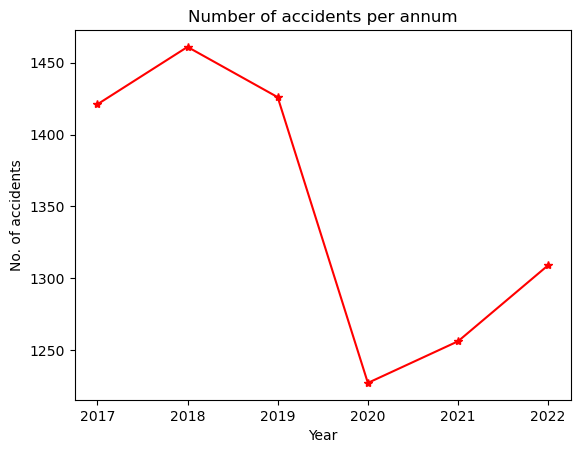

In [160]:
df["event_date"]=pd.to_datetime(df["event_date"]) #This ensure the date is the correct format
df["year"]=df["event_date"].dt.year #This extracts the year and add it to a column "year"

#Count the number of accidents per year and sort them in order
accident_pa=df["year"].value_counts().sort_index()

#Plot the graph
plt.plot(accident_pa.index,accident_pa.values,marker="*",color="r")
plt.title("Number of accidents per annum")
plt.xlabel("Year")
plt.ylabel("No. of accidents") 


## 2. Aircraft models with the most accidents


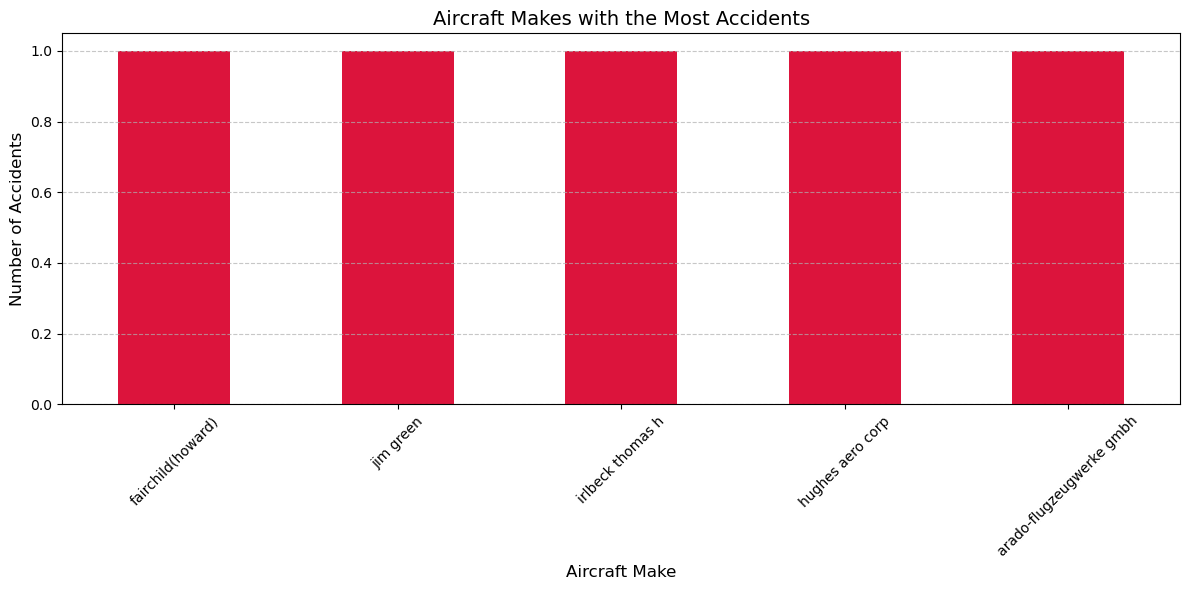

In [163]:
# Count occurrences of each aircraft make
accidents_by_make = df['make'].value_counts()

#display the 50 makes with the most accidents
top_50_accidents_by_make=accidents_by_make.tail(5)

plt.figure(figsize=(12, 6))
top_50_accidents_by_make.plot(kind='bar', color='crimson')
plt.title('Aircraft Makes with the Most Accidents', fontsize=14)
plt.xlabel('Aircraft Make', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## 3. Analyse accidents by weather conditions

This visualisation shows that airplane safety is adversely affected by weather conditions as more than 90% of accidents occur during adverse conditions

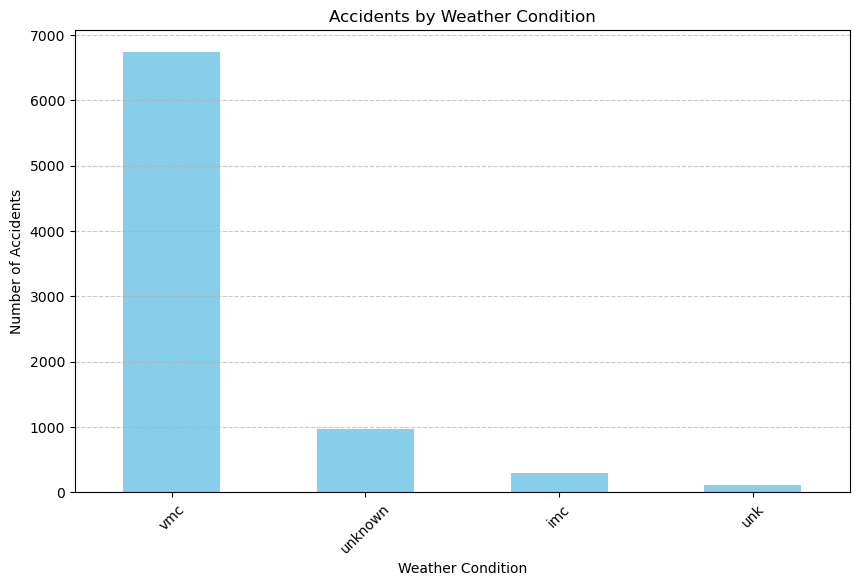

In [164]:

# Count accidents by each weather condition
weather_accidents = df['weather_condition'].value_counts()


# Plot weather accidents
weather_accidents.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 5.Analyse the number of accidents by severity

From the visualisation we can see that a majority of accidents,more than 80%,are non-fatal

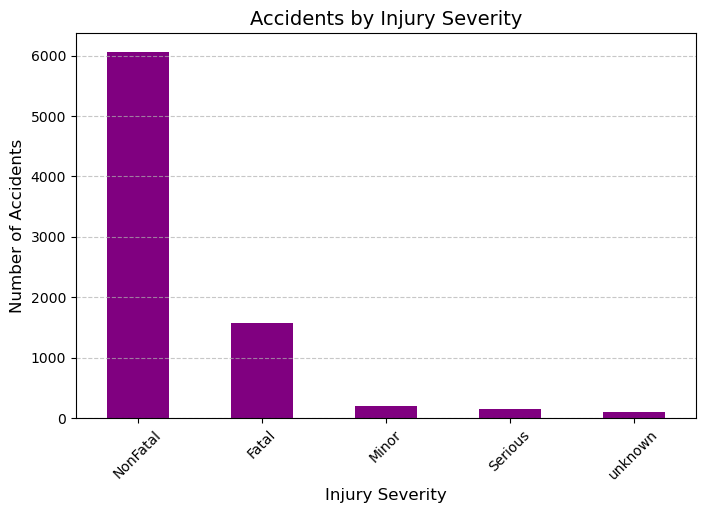

In [166]:
df["injury_severity"]=df["injury_severity"].str.replace("[^a-zA-Z]","",regex=True)
# Count accidents by injury severity
injury_severity_counts = df['injury_severity'].value_counts()

# Visualize injury severity distribution
plt.figure(figsize=(8, 5))
injury_severity_counts.plot(kind='bar', color='purple')
plt.title('Accidents by Injury Severity', fontsize=14)
plt.xlabel('Injury Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 6. Analyse injury severity by weather condition

We can see that majority of accidents caused by adverse weather conditions are non-fatal

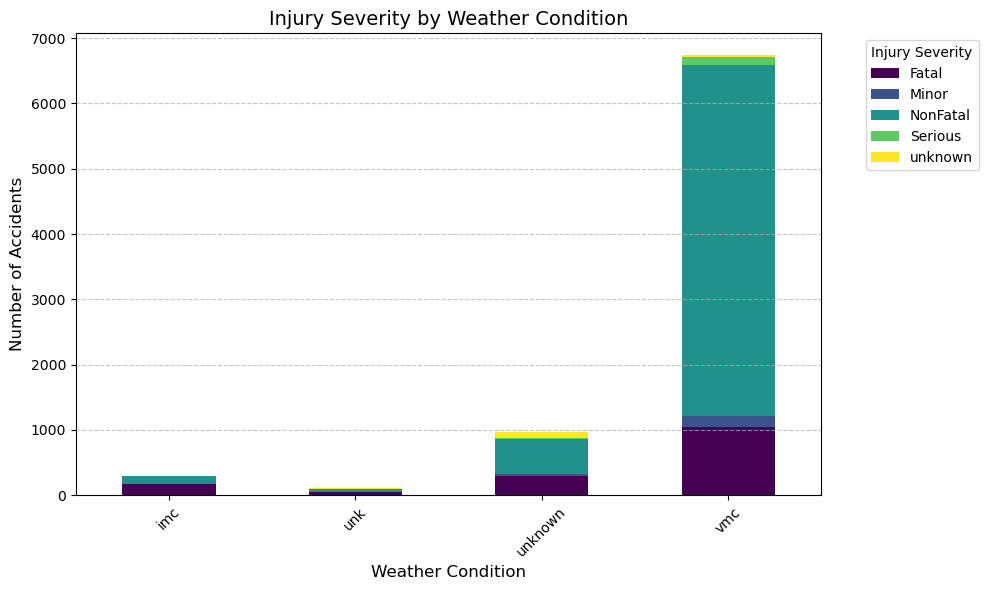

In [167]:
# Cross-tabulation of weather condition and injury severity
weather_injury = pd.crosstab(df['weather_condition'], df['injury_severity'])

# Visualize the relationship
weather_injury.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Injury Severity by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7.Analyse total fatal injuries by weather conditions

Majority of fatal injuries are as a result of adverse weather conditions

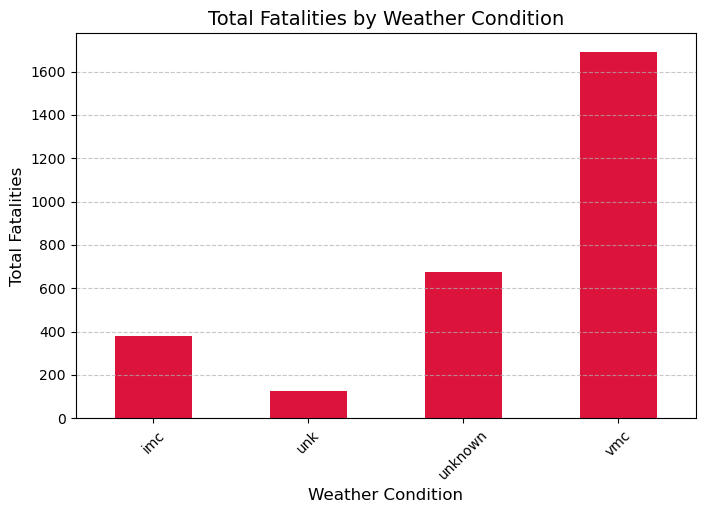

In [168]:
# Group by weather condition and calculate total fatalities
fatalities_weather = df.groupby('weather_condition')['total_fatal_injuries'].sum()

# Plot the relationship

plt.figure(figsize=(8, 5))
fatalities_weather.plot(kind='bar', color='crimson')
plt.title('Total Fatalities by Weather Condition', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Total Fatalities', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 8.Aircraft models with fewest fatalities per accidents

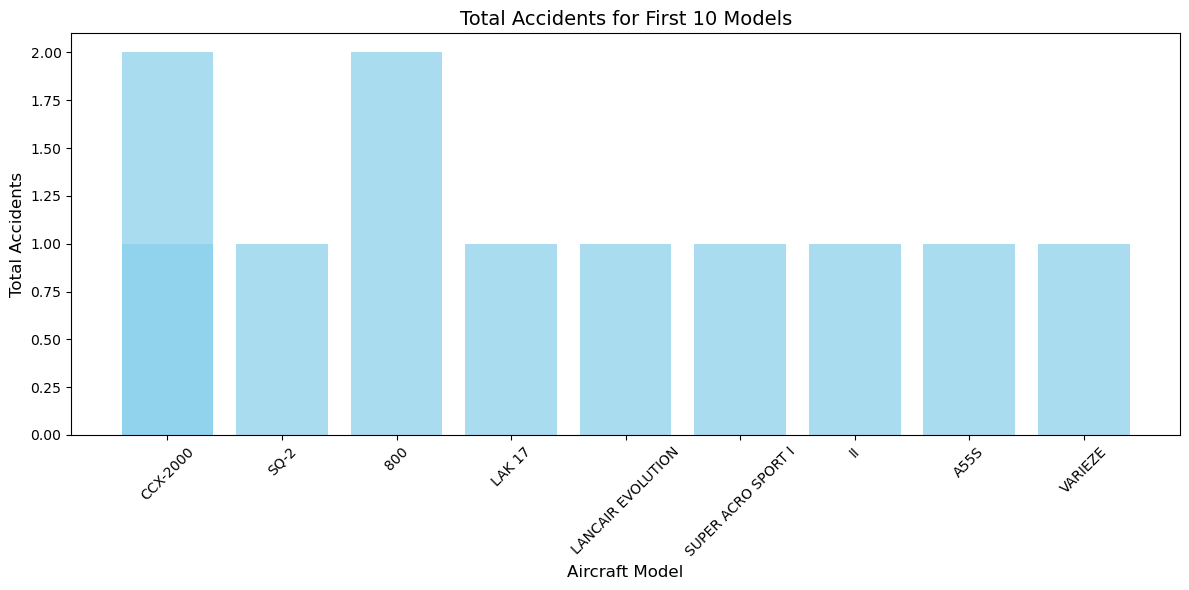

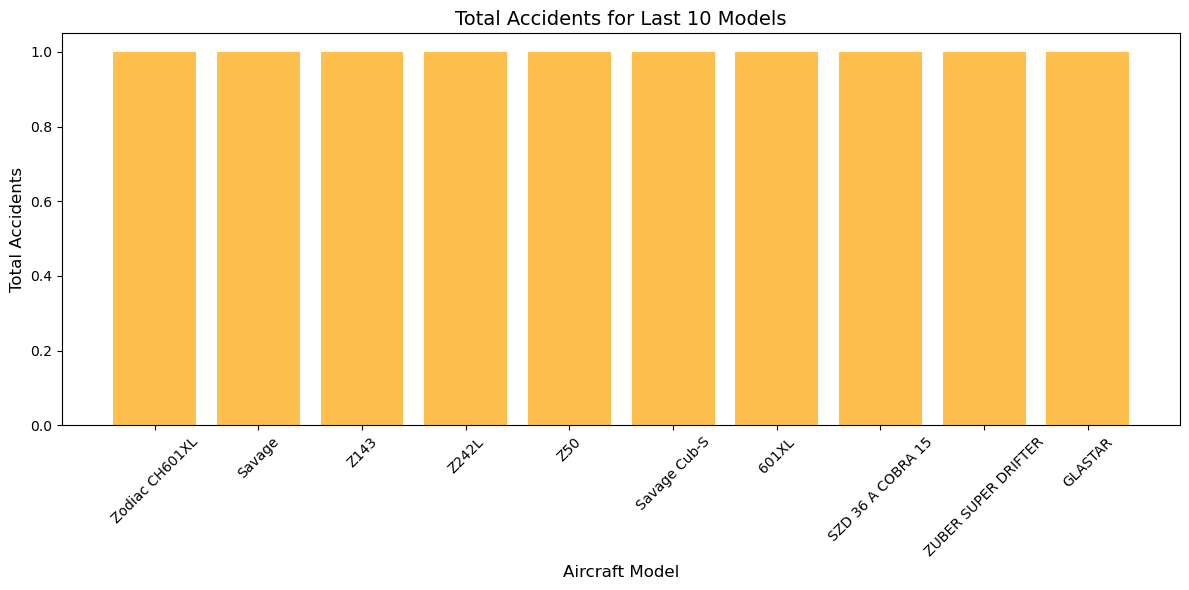

In [180]:
# Aggregate accident and fatality data by make and model
safest_models = df.groupby(['make', 'model']).agg({
    'event_id': 'count',  # Total accidents
    'total_fatal_injuries': 'sum'  # Total fatalities
})


# Bar chart for the first 10 models
plt.figure(figsize=(12, 6))
plt.bar(first_10_models.index.get_level_values('model'), first_10_models['event_id'], color='skyblue', alpha=0.7)
plt.title('Total Accidents for First 10 Models', fontsize=14)
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for the last 10 models
plt.figure(figsize=(12, 6))
plt.bar(last_10_models.index.get_level_values('model'), last_10_models['event_id'], color='orange', alpha=0.7)
plt.title('Total Accidents for Last 10 Models', fontsize=14)
plt.xlabel('Aircraft Model', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()